<a href="https://colab.research.google.com/github/marcgym2/MachineLearning/blob/main/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea en clase (2 puntos)
- Investigar sobre algún otro algoritmo no supervisado que pueda usarse en tu código. Da un panorama sobre el modelo matemático que emplea y explica por qué conviene aplicarlo a tus datos. Algunos modelos que no se vieron en clase son Affinity Propagation, BIRCH, DBSCAN, Mean Shift, Nearest Neighbors, OPTICS, Spectral Clustering, TSNE, entre otros
- Investigar otras estrategias para determinar número de grupos en estos algoritmos (como los índices de Calinski-Harabasz o de Davies-Bouldin), elegir la más adecuada al método que elegiste


# **DBSCAN**:  (Density-Based Spatial Clustering of Applications with Noise)

Este algoritmo conviene aplicarlo para nuestros datos, ya que trabajamos con una gran cantidad de variables continuas y puede identificar clústeres de diferentes formas y tamaños.

Utiliza un modelo matemático de densidad para identificar clústeres en un conjunto de datos. El modelo matemático se basa en la definición de densidad en el espacio de características, y el algoritmo trata de identificar regiones con alta densidad en el espacio de características que corresponden a los clústeres.

Funciona de la siguiente manera: se define un radio epsilón y un número mínimo de puntos que deben estar dentro de un radio epsilón alrededor de un punto para ser considerado una región densa. Cualquier punto que se encuentre en una región densa se considera un punto de núcleo, y los clústeres se identifican conectando puntos de núcleo que están dentro de un radio epsilón uno del otro.

## Métricas para evaluar la calidad de los clústeres 

Los índices de Calinski-Harabasz y Davies-Bouldin son métricas comúnmente utilizadas para evaluar la calidad de los clústeres generados por algoritmos de clustering. Ambos índices se basan en la idea de medir la separación entre los clústeres y la homogeneidad dentro de los clústeres.

Sin embargo, cuando se trata de variables continuas, el índice de **Calinski-Harabasz** suele ser el más adecuado. 

También conocido como el índice de varianza explicada, mide la razón entre la suma de las varianzas intra-clúster y la suma de las varianzas inter-clúster. Un valor más alto de este índice indica una mejor separación entre los clústeres y una mayor homogeneidad dentro de los clústeres.

Las variables continuas suelen tener una estructura subyacente más compleja que las variables categóricas o discretas, y es importante evaluar la calidad de los clústeres en términos de la distribución de los datos. Además, el índice de Calinski-Harabasz es sensible a la cantidad de clústeres, por lo que es una buena métrica para evaluar la cantidad óptima de clústeres en un conjunto de datos. 

## Tarea (8 puntos)
- Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes
- Elegir alguna métrica para determinar número de grupos, usarla y discutirla
- Busca alguna revista científica que publique trabajos relacionados con el tuyo
- Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía
- Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN # Algoritmo no supervisado
import matplotlib.pyplot as plt # Visualización
from sklearn.preprocessing import StandardScaler # Normalizar datos


In [8]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Cargamos los datos en un DataFrame de pandas
df_measures = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/measures_v2.csv")

In [3]:
# Seleccionamos las columnas que deseamos utilizar para clustering, descartando las sesiones de tiempo
X = df_measures[['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth', 
                 'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient']]

In [4]:
# Normalizar las variables
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [5]:
# Definir el modelo DBSCAN con los parámetros eps y min_samples
# eps: radio máximo de la vecindad de un punto (distancia euclidiana)
# min_samples: número mínimo de puntos que deben estar dentro del radio eps
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [ ]:
# Entrenar el modelo con los datos normalizados
dbscan.fit(X_norm)

In [16]:
# Obtenemos las etiquetas de cada punto, -1 indica ruido
labels = dbscan.labels_

In [17]:
# Imprimimos el número de clusters y puntos ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Número de clusters encontrados:', n_clusters_)
print('Número de puntos considerados como ruido:', n_noise_)

Número de clusters encontrados: 3060
Número de puntos considerados como ruido: 487178


In [19]:
# Añadimos las etiquetas al DataFrame
df_measures['cluster'] = labels

# Mostramos los resultados
print(df_measures.head())


        u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.450682  18.805172       19.086670 -0.350055     18.293219     0.002866   
1 -0.325737  18.818571       19.092390 -0.305803     18.294807     0.000257   
2 -0.440864  18.828770       19.089380 -0.372503     18.294094     0.002355   
3 -0.327026  18.835567       19.083031 -0.316199     18.292542     0.006105   
4 -0.471150  18.857033       19.082525 -0.332272     18.291428     0.003133   

        i_d       i_q         pm  stator_yoke    ambient    torque  \
0  0.004419  0.000328  24.554214    18.316547  19.850691  0.187101   
1  0.000606 -0.000785  24.538078    18.314955  19.850672  0.245417   
2  0.001290  0.000386  24.544693    18.326307  19.850657  0.176615   
3  0.000026  0.002046  24.554018    18.330833  19.850647  0.238303   
4 -0.064317  0.037184  24.565397    18.326662  19.850639  0.208197   

   profile_id  cluster  
0          17        0  
1          17        0  
2          17        0  
3   

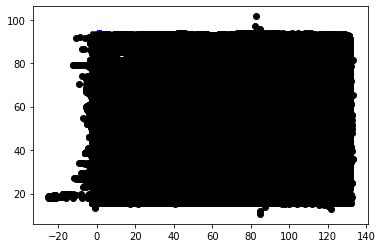

In [20]:
# Creamos un array de colores para los puntos
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'orange']
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        # Pintamos los puntos ruido de negro
        color = 'black'
    else:
        color = colors[label % len(colors)]
    # Seleccionamos los puntos con esta etiqueta y los pintamos
    x = X_db[labels == label]
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], color=color)

In [ ]:
# Mostramos el gráfico
plt.title('DBSCAN')
plt.show()
